# Farshid PirahanSiah
## Created 01.Jan.2022
## Last Update 13.Jan.2022

The first step for camera calibration is corner detection. Based on my research, the calibration pattern image play important rule in the whole calibration process.

1. Camera calibration for multi-modal robot vision based on image quality assessment
https://www.researchgate.net/profile/Farshid-Pirahansiah/publication/288174690_Camera_calibration_for_multi-modal_robot_vision_based_on_image_quality_assessment/links/5735bc2908aea45ee83c999e/Camera-calibration-for-multi-modal-robot-vision-based-on-image-quality-assessment.pdf 

2. Pattern image significance for camera calibration
https://ieeexplore.ieee.org/abstract/document/8305440 

3. Camera Calibration and Video Stabilization Framework for Robot Localization
https://link.springer.com/chapter/10.1007/978-3-030-74540-0_12 


In [13]:
import numpy as np
import cv2
import tqdm
import sys
import os
import urllib
from scipy import signal as sig
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy import *

from scipy.ndimage import gaussian_filter
from IPython.display import Image
from IPython import display

sys.path.append(r'local_functions')
#from list_files import list_files

%matplotlib tk
%matplotlib
%matplotlib inline
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()
print("farshid")

Using matplotlib backend: TkAgg
farshid


In [27]:
root_path=r'/dataSet'
output_path=r'/output'

def show_image(img):
    width = 6#12
    height = 6#12
    fig=plt.figure(figsize=(width, height))    
    plugins.connect(fig, plugins.MousePosition())
    plt.imshow(img)
    plt.show()
    return 1
    

def color_coord(image,x,y):
    if(len(image.shape)<3):
      print ('gray')
      value=image[ x,y]
    elif len(image.shape)==3:
        print ('Color(BGR)')
        b,g,r = image[x,y,0], image[x,y,1], image[x,y,2]
        value=(b,g,r)
    else:
        print ('others')
    #value=image[y, x, c]
    return value

In [28]:
ROOT_DIR = os.path.dirname(os.path.abspath("__file__")) #os.path.dirname(os.path.abspath(__file__))
FILE_PATH = os.path.join(ROOT_DIR+ root_path)
print(FILE_PATH)

/Users/farshid/code/pirahansiah/CV_metaverse/3D_multi_camera_calibration/corner_detection/dataSet


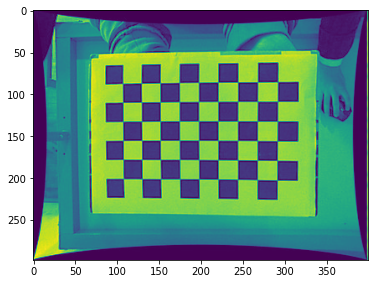

gray
40


In [37]:
#fileName=FILE_PATH+"/chessboard1.png"
#img_main = cv2.imread(fileName,-1)
filePathURL = r"https://raw.githubusercontent.com/opencv/opencv/4.x/doc/tutorials/calib3d/camera_calibration/images/fileListImageUnDist.jpg" 
# req = urllib.request.urlopen(filePathURL) #'http://answers.opencv.org/upfiles/logo_2.png')
# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img_main = cv2.imdecode(arr, -1) # 'Load it as it is'
# cid=show_image(np.float32(img_main))

img_main = imread(filePathURL)


img_src= img_main.copy()
if len(img_main.shape)==3:
    gray_img=cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY) 
else:
    gray_img=img_src.copy()
# see the results
imageShow=gray_img.copy()
if len(img_main.shape)==3:
    pass 
else:
    imageShow=cv2.cvtColor(imageShow,cv2.COLOR_GRAY2RGB)
cid=show_image(imageShow)
value=color_coord(imageShow,140,125)
print(value)